In [1]:
import numpy as np, random, operator, pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create a list of co-ordinates of nodes (co-ordinates are taken from simulator)
NodeList = [(5,2.2),(12.5,2.2),(18.2,2.2),(17,8),(0,8),(-10,-5.5),(5,6.1),(-10,2.2),(12.5,-5.5),(5,-12.5)]


In [3]:
def create_new_member(lst):
    '''
    creating new member of the population
    '''
    pop=set(np.arange(lst,dtype=int))
    route=list(random.sample(pop,lst))
            
    return route

In [4]:
def create_starting_population(size,Number_of_node):
    '''Method create starting population 
    size= No. of the nodes
    Number_of_house= Total No. of the nodes
    '''
    population = []
    
    for i in range(0,size):
        population.append(create_new_member(Number_of_node))
        
    return population

In [5]:
def pick_mate(N):
    '''mates are randomaly picked 
    N= no. of node '''
    i=random.randint(0,N)    
    return i

In [6]:
def distance(i,j):
    '''
    Method calculate distance between two nodes if coordinates are passed
    i=(x,y) coordinates of first node
    j=(x,y) coordinates of second node
    '''
    #returning distance of node i and j 
    return np.sqrt((i[0]-j[0])**2 + (i[1]-j[1])**2)

In [7]:
def score_population(population, NodeList):  
    '''
    Score of the whole population is calculated here
    population= 2 dimensional array conating all the routes
    Nodelist= List of the Houses 
    '''
    scores = []
  
    for i in population:
        scores.append(fitness(i, NodeList))
    return scores

In [8]:
def fitness(route,NodeList):
    '''Individual fitness of the routes is calculated here
    route= 1d array
    NodeList = List of the nodes
    '''
    #Calculate the fitness and return it.
    score=0
    for i in range(1,len(route)):
        k=int(route[i-1])
        l=int(route[i])

        score = score + distance(NodeList[k],NodeList[l])
        
        
    return score

In [9]:
def crossover(a,b):
    '''
    cross over 
    a=route1
    b=route2
    return child
    '''
    child=[]
    childA=[]
    childB=[]
    
    
    geneA=int(random.random()* len(a))
    geneB=int(random.random()* len(a))
    
    start_gene=min(geneA,geneB)
    end_gene=max(geneA,geneB)
    
    for i in range(start_gene,end_gene):
        childA.append(a[i])
        
    childB=[item for item in a if item not in childA]
    child=childA+childB
    
    
    
       
    return child

In [10]:
def mutate(route,probablity):
    '''
    mutation 
    route= 1d array
    probablity= mutation probablity
    '''
    #for mutating shuffling of the nodes is used
    route=np.array(route)
    for swaping_p in range(len(route)):
        if(random.random() < probablity):
            swapedWith = np.random.randint(0,len(route))
            
            temp1=route[swaping_p]
            
            temp2=route[swapedWith]
            route[swapedWith]=temp1
            route[swaping_p]=temp2
    
    return route

In [11]:
def selection(popRanked, eliteSize):
    selectionResults=[]
    result=[]
    for i in popRanked:
        result.append(i[0])
    for i in range(0,eliteSize):
        selectionResults.append(result[i])
    
    return selectionResults

In [12]:
def rankRoutes(population,House_List):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = fitness(population[i],House_List)
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = False)

In [13]:
def breedPopulation(mating_pool):
    children=[]
    for i in range(len(mating_pool)-1):
            children.append(crossover(mating_pool[i],mating_pool[i+1]))
    return children

In [14]:
def mutatePopulation(children,mutation_rate):
    new_generation=[]
    for i in children:
        muated_child=mutate(i,mutation_rate)
        new_generation.append(muated_child)
    return new_generation

In [15]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [16]:
def next_generation(Node_List,current_population,mutation_rate,elite_size):
    population_rank=rankRoutes(current_population,Node_List)
    
    #print(f"population rank : {population_rank}")
    
    selection_result=selection(population_rank,elite_size)
    #print(f"selection results {selection_result}")
    
    mating_pool=matingPool(current_population,selection_result)
    #print(f"mating pool {mating_pool}")
    
    children=breedPopulation(mating_pool)
    #print(f"childern {children}")
    
    next_generation=mutatePopulation(children,mutation_rate)
    #print(f"next_generation {next_generation}")
    return next_generation

In [17]:
def genetic_algorithm(Node_List,size_population=1000,elite_size=75,mutation_Rate=0.1,generation=2000):
    '''size_population = 1000(default) Size of population
        elite_size = 75 (default) No. of best route to choose
        mutation_Rate = 0.1 (default) probablity of Mutation rate [0,1]
        generation = 2000 (default) No. of generation  
    '''
    pop=[]
    progress = []
    
    Number_of_Nodes=len(Node_List)
    
    population=create_starting_population(size_population,Number_of_Nodes)
    progress.append(rankRoutes(population,Node_List)[0][1])
    int_pop = population[0]
    print(f"initial route distance {progress[0]}")
    for i in range(0,generation):
        pop = next_generation(Node_List,population,mutation_Rate,elite_size)
        progress.append(rankRoutes(pop,Node_List)[0][1])  
    
    rank_=rankRoutes(pop,Node_List)[0]
    int_pop.append(50)
    print(f"initial route {int_pop}")
    # Here 50  denotes the initial position of truck.
    bst_rout = pop[rank_[0]]
    fstb_rout = 50
    bst_lst = []
    for k in range(0, len(bst_rout)):
        bst_lst.append(bst_rout[k])
    bst_lst.append(50)
    print(f"Best Route :{bst_lst} ")
    print(f"best route distance {rank_[1]}")
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()
    
    return rank_, pop

initial route distance 91.51325808538651
initial route [4, 6, 2, 3, 7, 5, 1, 8, 0, 9, 50]
Best Route :[3, 1, 2, 8, 9, 5, 4, 6, 0, 7, 50] 
best route distance 90.4823856366176


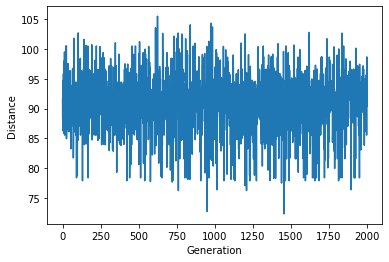

In [18]:
rank_,pop=genetic_algorithm(Node_List=NodeList)

In [19]:
x_axis=[]
y_axis=[]
for i in NodeList:
    x_axis.append(i[0])
    y_axis.append(i[1])

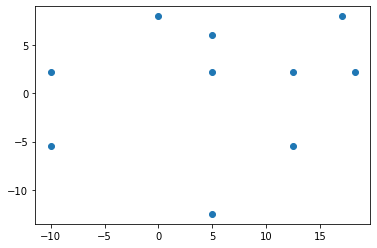

In [20]:
plt.scatter(x_axis,y_axis)
plt.show()
